In [1]:
from src.setup import *

# Data Quality

_All data is dirty, some data is useful._

c.f. George Box

In the earlier lessons, we looked at how one goes about getting the data into an analysis system and touched on identifying data that has clearly "gone bad" at the level of individual data points in other lessons.  In this lesson we look at remediation of messy and marked data.

Your data may have problems, not in its individual details, but in its overall "shape" and character.  In some cases, these problems will pertain to the general collection techniques used, and to systematic bias that might be introduced during collection.  In other cases, problems are not the fault of data collectors, but simply of units and scales, and correction can be quite mechanical and routine.

## Missing Data

_Absence of evidence is not evidence of absence._

–Martin Rees

The course has looked at mechanical or statistical tests to identify some data as missing, or as unreliable enough that it is better to pretend it is missing.  We have not yet decided whether to keep or drop the observations to which those missing data points belong.  We need to access the significance of those missing data to our overall data set.

When we have a record with missing data, we essentially have two choices about its disposition.  On the one hand, we can discard that particular record.  On the other hand, we can impute some value for the missing value.  Imputation is discussed in the next lesson.

In some sense there is a third options as well: we may decide that because of the amount or distribution of missing data in our data set, the data is simply not usable for the purpose at hand.  While, as data scientists we never want to declare a task hopeless, as responsible researchers we need to consider the possibility that particular data simply cannot support any conclusions.  Missing data is not the *only* thing that could lead us to this conclusion, but it is certainly one common fatal deficit.

In [2]:
df = pl.read_parquet('data/usa_names.parq') 
GT(df.head(10))

Age,Gender,Name,Favorite_Color,Favorite_Flower
48,F,Lisa,Yellow,Daisy
62,F,Karen,Green,Rose
26,M,Michael,Purple,None
73,F,Patricia,Red,Orchid
13,F,Ava,Green,Violet
71,F,Patricia,Red,Rose
73,F,Linda,Red,Daisy
30,F,Amanda,Black,None
3,M,Logan,Blue,Daisy
12,F,Isabella,Yellow,Lily


If we wish to discard records—but also to a large extent if we wish to impute values—we need to think about whether what remains will be a fair representation of the parameter space of the data.  Sample bias can exist not only in the overall composition of a data set, but also more subtly in the distribution of missing values.  Keep in mind that "missing" here might result from the processing discussed in the _Anamoly Detection_ lesson.  Some values may have been marked missing because we could determine they were unreliable, even if they were not per se absent in the raw data.

I created a hypopthetical data set of persons with names, ages, gender, and favorite color and flower.  The ages, genders, and names, are modeled on the actual distribution of popular names over time reported by the United States Social Security Administration.  I assigned favorite colors and flowers to the people for this illustration.

In [3]:
GT(df.describe()).fmt_number(columns="Age", decimals=0)

statistic,Age,Gender,Name,Favorite_Color,Favorite_Flower
count,"6,342",6342,6342,5599,5574
null_count,0,0,0,743,768
mean,42,None,None,None,None
std,27,None,None,None,None
min,2,F,Abigail,Black,Daisy
25%,19,None,None,None,None
50%,39,None,None,None,None
75%,63,None,None,None,None
max,101,M,William,Yellow,Violet


In general, this is an ordinary looking data set, with a moderately large collection of records.  We can notice in the DataFrame summary that at least some data is missing.  This is worth investigating more carefully.

Using Panda's `.describe()` method or similar summaries by other tools allows us to see that `Age`, `Gender`, and `Name` have values for all 6,342 records.  However, `Favorite_Color` and `Favorite_Flower` are missing for approximately 750 records each.  In itself, missing data in 10-15% of the rows is quite likely not to be a huge problem.  

That statement assumes that missingness is not itself biased. Even if we need to discard those records altogether, that is a relatively small fraction of a relatively large data set.  Likewise, imputing values would *probably* not introduce too much bias, and other features could be utilized within those records.  In the below section and in the lesson on _Value Imputation_, in relation to undersampling and oversampling, I'll discuss dangers of exclusion resulting in class imbalance.

In [4]:
_df = (df.with_columns(pl.col("Age")
        .map_elements(lambda x: x//10 * 10).alias('Age Group')))

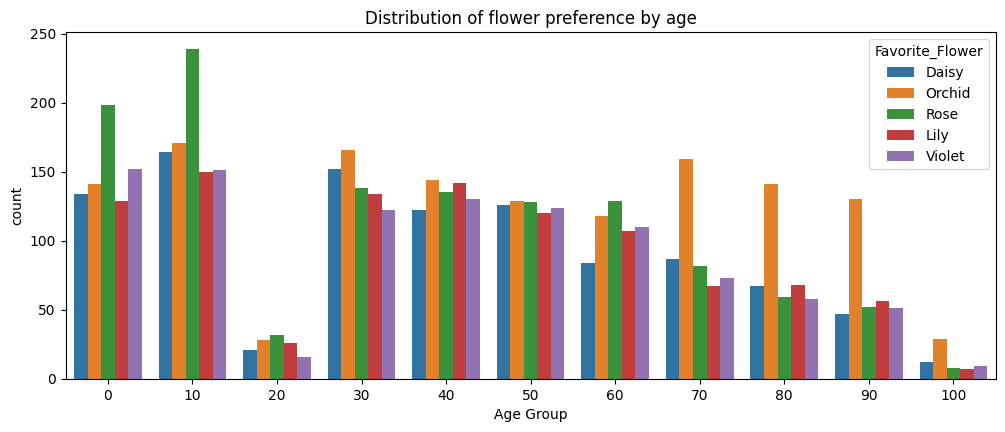

In [5]:
fig, ax = plt.subplots(figsize=(12, 4.5))
sns.countplot(x="Age Group", hue="Favorite_Flower", ax=ax, data=_df)
ax.set_title("Distribution of flower preference by age");

While uniformly randomly missing data can be worked around relatively easily, data that is missing in a biased way can present a more significant problem.  To figure out which category we are in with this dataset, let us compare those missing flower preferences to the ages of the people.  Looking at every individual age up to 101 years old is hard to visualize; for this pupose we will group people into ten year age groups.  The graph uses the Seaborn statistical graphing library that is built on top of Matplotlib.

A few patterns jump out in this visualization.  It appears that older people tend to have a strong preference for orchids, and young people a moderate preference for roses.  This is perhaps a property of the data meriting analysis. More signficantly for this section, there are very few data points for favorite flower at all in the 20-30 age group.

One might imagine several explanations, but the true answer would depend on problem and domain knowledge.  For example, perhaps the data was not collected during a certain time period corresponding to these ages.  Or perhaps people in that age group reported a different favorite flower but its name was lost in some prior inaccurate data validation or cleaning step.

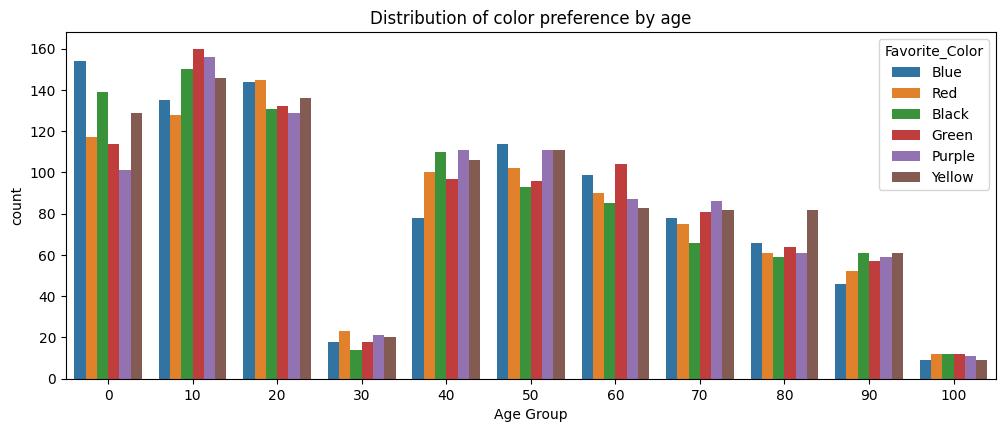

In [6]:
fig, ax = plt.subplots(figsize=(12, 4.5))
sns.countplot(x="Age Group", hue="Favorite_Color", ax=ax, data=_df)
ax.set_title("Distribution of color preference by age");

If we look at the records with missing color preference, we see a similar pattern in relationship to age.  However, the drop in frequency of available values occurs instead in the 30-40 age group. 

If we were to drop *all* records with missing data, we would wind up with nearly no representation of people in the entire 20-40 age range.  This biased unavailability of data would be likely to weaken the analysis generally.  The number of records would remain fairly large, but the parameter space, as mentioned, would have an empty region, or at least one much less densely occupied.

Obviously, my statements depend both on the purpose of the data analysis and our assumptions about the underlying domain.  If age is not an important aspect of the problem in general, our approach might not matter much.  But if we think age is a signficant independent variable, dropping this data would probably not be a workable approach.

## Biasing trends

_It is not the slumber of reason that engenders monsters, but vigilant and insomniac rationality._

Gilles Deleuze

This lesson shows explorations you should typically perform on a data set.  I cannot provide one simple answer for the best remediation of bias in missing data.  That decision will be greatly dependent upon the purpose for which the data is being used and also on background domain knowledge that may clarify the reasons for the data being missing.  Remediation is inevitably a per-problem decision. When you are able to detect a sample bias within your data, you will need to make a domain area judgement about the significance of that bias.

There are at least two kinds of sample bias that you should be on the lookout for.  On the one hand, the distribution of observations may not match the distribution in the underlying domain.  Quite likely, you will need to consult other data sources—or simply use your own domain area knowledge—to detect such a skew in the samples.  On the other hand, the data themselves may reveal a bias by trends that exist between multiple variables.  In this latter case, it is important to think about whether the detected "trend" could be a phenomenon you have detected in the data, or is a collection or curation artifact.

### Understanding Bias

<img src="img/bias.png"/>


In the most neutral statistical sense, bias is simply the fact that a data set does not accurately represent its underlying population. More often than not, neither we data scientists, who analyze data, nor the people or instruments that collected the raw data in the first place, can provide an unambiguous delineation of exactly what belongs to the underlying population.  In fact, the population is often somewhat circularly defined in terms of data collection techniques.

An old joke observes someone looking for their lost keys at night in the area under a street light.  Asked why they do not also look elsewhere, they answer that it is because the visibility is better where they are looking. Observers make observations of what they can *see*, and not what they cannot see. "Seeing" here is mostly metaphorical, to encompass voltages in an instrument, or bits on a wire, not just actual human eyes.

It is easy not to be conscious of bias that exists in data, and probably that much easier when it indeed *does* concern human or social subjects and human observers bring in psychological and social biases.  But it is humans, in the end, even if aided by instruments we set up, who make observations of everything else too.  

For example, the history of ethology (the study of animal behavior) is largely a history of scientists seeing the behaviors in animals that exist—or that they believe should exist—in the humans around them, that they impose by metaphor and blindness.  If you make a survey of books in your local library to determine the range of human literature or music, you will discover the predominance of writers and musicians who use your local language and play your local musical style.  Even in areas that seem most obviously *not about* humans, our vantage point may create a perspectival bias.  For example, if we catalog the types of stars that exist in the universe, and the prevalence of different types, we are always observing those within our cosmological horizon, which not only expresses an interaction of space and time, but also may not uniformly describe the entire universe.  Cosmologists know this, of course, but they know it as an inherent bias to their observations.

In [7]:
names = pd.read_parquet('data/usa_names_states.parq')
names['Age Group'] = names.Age//10 * 10
GT(names.head(10))

Age,Birth_Month,Name,Gender,Home,Age Group
17,June,Matthew,M,Hawaii,10
5,September,Emma,F,West Virginia,0
4,January,Liam,M,Alaska,0
96,March,William,M,Arkansas,90
7,March,William,M,Hawaii,0
33,February,Christopher,M,Maryland,30
71,February,Robert,M,Massachusetts,70
13,May,Joshua,M,Alaska,10
59,May,John,M,South Carolina,50
62,July,James,M,U.S. Virgin Isl,60


In this lesson, we will a synthetic U.S. name/age data to illustrate bias patterns.  These data approximately accurately represents the frequency of different names across different age groups, based on Social Security Administration data.  We can see that within the actual domain, the popularity of various names authentically changed over time.  As a few minutes ago, it is useful to aggregate people into coarser age groups for visualization.

I try to avoid social bias in the data sets I select or create as examples. For the imagined people in the rows of the name tables, I added features like favorite color or flower rather than more obviously ethnically or culturally marked features like eye color, favorite food, or musical preference.  

In [8]:
names.Name.unique()

array(['Matthew', 'Emma', 'Liam', 'William', 'Christopher', 'Robert',
       'Joshua', 'John', 'James', 'Deborah', 'Ashley', 'Linda', 'Jason',
       'Amy', 'Isabella', 'Amanda', 'Judith', 'Richard', 'Michael',
       'Mary', 'Sophia', 'Noah', 'Jacob', 'Mason', 'Samantha', 'Susan',
       'David', 'Ethan', 'Michelle', 'Lisa', 'Jennifer', 'Dorothy',
       'Melissa', 'Jessica', 'Olivia', 'Ava', 'Madison', 'Betty',
       'Patricia', 'Daniel', 'Karen', 'Carol', 'Barbara', 'Alexander',
       'Debra', 'Kimberly', 'Emily', 'Sarah', 'Heather', 'Charles',
       'Tyler', 'Shirley', 'Hannah', 'Andrew', 'Margaret', 'Logan',
       'Alexis', 'Joan', 'Helen', 'Abigail', 'Jayden', 'Nicholas',
       'Angela', 'Ruth', 'Brittany', 'Charle', 'Oliver', 'Donna',
       'Sandra'], dtype=object)

Even those invented features I use are not entirely independent of culture though, and perhaps my position in the social world leads me to choose different factor values than would someone located elsewhere.  Moreover, by choosing the *top 5* most popular names in the United States each year, I impose a kind of majority bias: all are roughly Anglo names, and none, for example, are characteristically African-American, Latino, Chinese, or Polish, though such are all common outside of that top-5-by-year collation methodology.

The fields `Birth_Month` and `Home` are added to this data set, and let us stipulate that we suspect they may indicate some bias in the observations.  Before we look at that, let us take a look at a more-or-less expected trend.

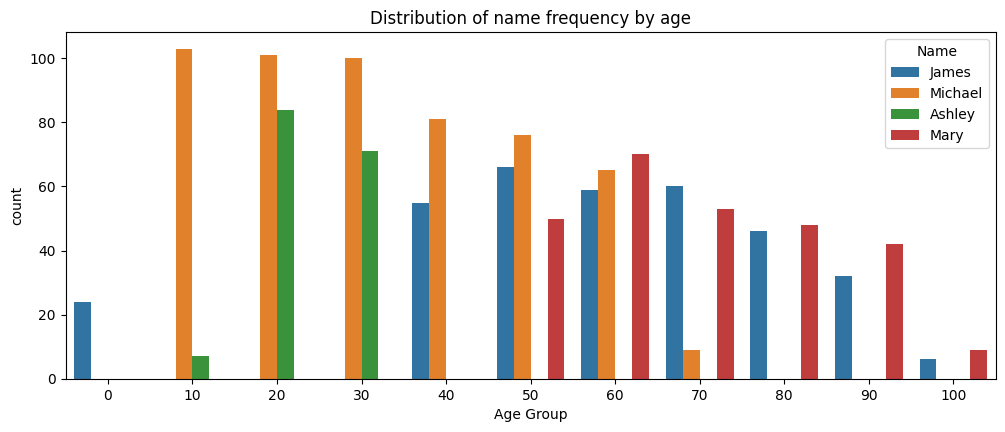

In [9]:
fig, ax = plt.subplots(figsize=(12, 4.5))
somenames = ['Michael', 'James', 'Mary', 'Ashley']
popular = names[names.Name.isin(somenames)]
sns.countplot(x="Age Group", hue="Name", ax=ax, data=popular)
ax.set_title("Distribution of name frequency by age");

We can see trends in this data.  Mary is a popular name among the older people in the data set, but no longer shows up in the most popular names for younger people.  Ashley is very popular among 20-40 year olds, but we do not see it present outside that age group.  James seems to have been used over most of the age range, although it fell out of the top-5  spot among 10-40 year olds, resurging among children under 10.  Michael, similarly seems represented from 10-60 years of age.

The top-5 threshold used in generation of the data has definitely created a few artifacts in the visualization, but a general pattern of some names becoming popular and others waning is exactly a phenomenon we would expect with a bare minimum of domain knowledge.  Moroever, if we know only a little bit more about popular baby names in the United States, the specific distribution of names will seem plausible; both for the 4 shown and for the remaining 65 names that you can investigate within the data set.

### Detecting Bias

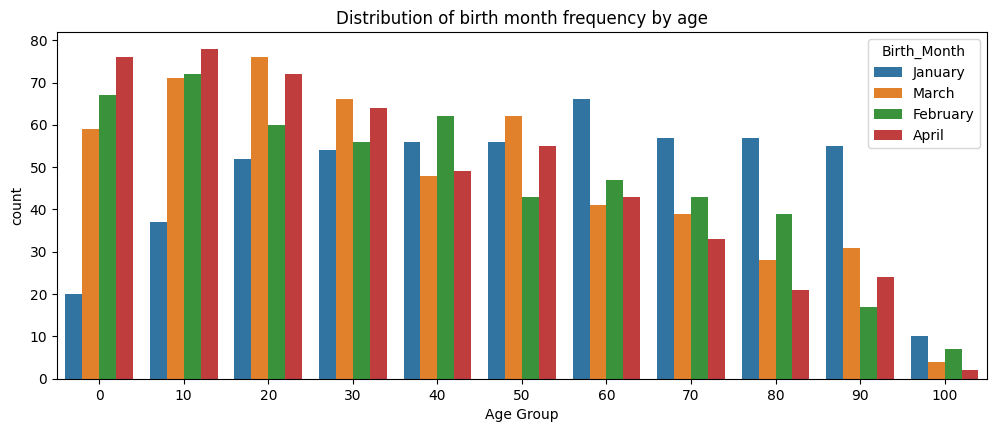

In [10]:
fig, ax = plt.subplots(figsize=(12, 4.5))
months = ['January', 'February', 'March', 'April']
popular = names[names.Birth_Month.isin(months)]
sns.countplot(x="Age Group", hue="Birth_Month", ax=ax, data=popular)
ax.set_title("Distribution of birth month frequency by age");

Let's apply a similar analysis to birth month as we did to name frequency.  A minumum of domain knowledge will tell you that while there are small annual cyclicities in birth month, there should not be a general trend over ages.  Even if some world historical event had dramatically affected births in one particular month of one particular year, this should create little overall trend when we aggregate over decades of age.

Contrary to our hope of excluding a biasing trend, we have discovered that—for unknown reasons—January births are dramatically underrepresented among the youngest people and dramatically overrepresented among the oldest people.  This is overlain on an age trend of there being more young people, in general, but the pattern nonetheless appears strong.  This graph does not look at months beyond April; this could be done in a similar fashion.

A certain amount of random fluctuation occurs in the data set simply because of sampling issues.  The fact that April is a somewhat more common birth month for 50-something people than for 40-something people in the data set is quite likely meaningless since there are relatively few data points (on the order of 50) once we have cross-cut by both age and birth month.  Distinguishing genuine data bias from randomness can require additional analysis. By construction, the January pattern jumps out strongly even in the simple visualization.

In [11]:
by_month = (names.groupby('Age Group')
    .Birth_Month.value_counts().unstack())
by_month = by_month[month_names]
GT(by_month.reset_index().iloc[:, :9])

Age Group,January,February,March,April,May,June,July,August
0,20,67,59,76,66,77,71,65
10,37,72,71,78,70,73,82,81
20,52,60,76,72,65,65,71,66
30,54,56,66,64,73,58,87,82
40,56,62,48,49,45,50,58,55
50,56,43,62,55,53,43,58,48
60,66,47,41,43,54,34,41,51
70,57,43,39,33,39,36,45,34
80,57,39,28,21,31,37,23,28
90,55,17,31,24,21,23,30,29


There are numerous ways we might analyze this month bias, but looking for notable differences in the spread of one variable in relation to another can be a good hint.  For example, we think we see an oddness in the pattern of January birth months, but is there a general irregularity in the distribution per age?  We *could* attempt to analyze this using exact age, but that probably makes the distinction too fine grained to have good subsample sizes.  The decade of age is an appropriate resolution for this test.  As always, think about your subject matter in making such judgements.

Since the number people of decreases with age, we need to find statistics that are not overly influenced by the raw numbers.  In particular, we can count the number of records we have for each age group and birth month and see if those counts are notably divergent.  Variance or standard deviation (of counts) will increase as the size of age group increases.  However, we can normalize that simply by dividing by the raw count within age group of all months.

In [12]:
norm = pd.DataFrame(
    {"Normalized": by_month.var(axis=1) / by_month.sum(axis=1)})
GT(norm.reset_index()).fmt_number(columns="Normalized", decimals=3)

Age Group,Normalized
0,0.290
10,0.173
20,0.062
30,0.139
40,0.077
50,0.060
60,0.169
70,0.104
80,0.227
90,0.285


The full data grid was too details to immediately draw a conclusion. Let's look at the normalized variance across age groups.

The over 100 year old group shows a low normalized variance, but it is a small subset.  Among the other age groups, the middle ages show a notably lower normalized variance across months than do the older or younger people.  This difference is quite striking for those under 10 and those over 80 years old.  

We can reasonably conclude at this point that *some kind* of sample bias occurred in the collection of birth month; specifically, there is a different bias in effect based on age group of persons sampled.  Whether or not this bias *matters* for the purpose at hand, *the fact should be documented clearly* in any work products of your analyses or models.

In [13]:
states = pd.read_fwf('data/state-population.fwf')
states["House_Seats"] = states.House_Seats.round(0).astype(pd.UInt8Dtype())
del states["Population_2010"]

### Comparison to Baselines

In [14]:
GT(states.head())

State,Population_2019,House_Seats
California,39512223,53
Texas,28995881,36
Florida,21477737,27
New York,19453561,27
Pennsylvania,12801989,18


The setup of our synthetic person data introduced both birth month and `Home` in the sense of state or territory of residence and/or birth.  While there is no documented metadata that definitively clarifies the meaning of the column, let us take it as state of current residence.  If we had chosen to interpret it as birthplace, we might need to find historical data on populations at the times people of various ages were born; clearly that is possible, but the current assumption simplifies our task.

Let us take a look at the current population of the various U.S. states.  This will provide an external baseline relative to which to look for sample bias in the data set under consideration.

As most students will know, the range of population sizes across different U.S. states and territories is quite large.  Representation of states in the House of Representatives is given as a whole number.

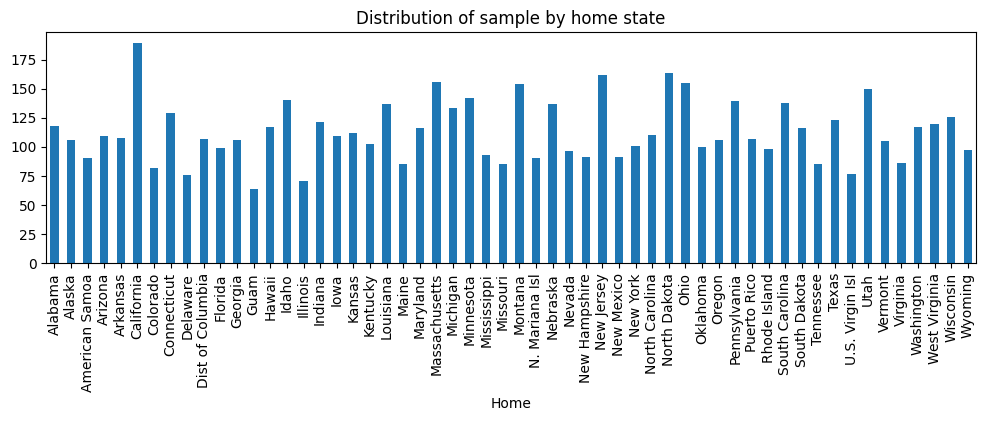

In [15]:
(names.Home
  .value_counts()
  .sort_index()
  .plot(kind='bar', figsize=(12, 3), 
        title="Distribution of sample by home state")
);

Let us take a look at the distribution of home states of persons in the data set. The step of sorting the index is used to assure that states are listed in alphabetical order, rather than by count or something else.

There is clearly variation in the number of samples drawn from residents of each state.  However, the largest state represented, California, has only about 3x the number of samples as the smallest.  In comparison, a similar view of the underlying populations emphasizes the different distribution.

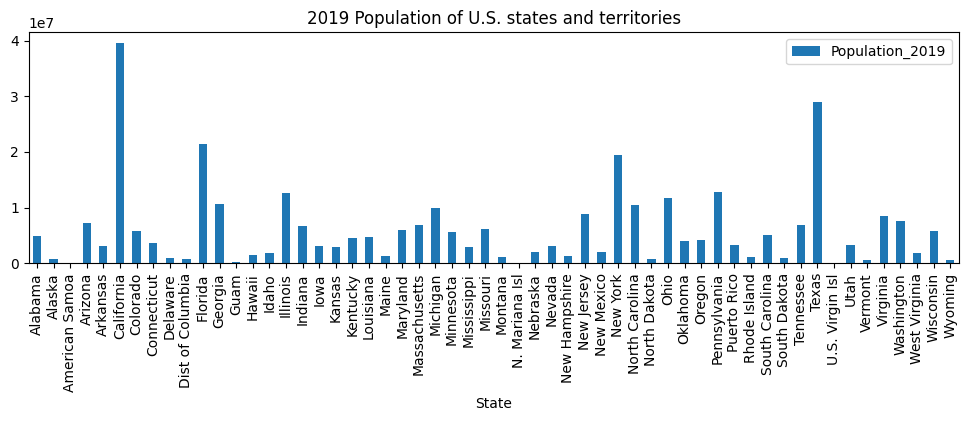

In [16]:
(states
  .sort_values('State')
  [['State', 'Population_2019']]
  .set_index('State')
  .plot(kind='bar', figsize=(12, 3),
        title="2019 Population of U.S. states and territories"));

While California provides the most samples for this data set, Californians are simultaneously the *most underrepresented* relative to the baseline population of the states.  As a general pattern, smaller states tend to be overrepresented generally.  We can, and probably should, think of this as selection bias based on the size of the various states.  Unless we have accurate documentation or metadata that describes the collection and curation procedures, we cannot be sure of the cause of the imbalance.  But a strong trend exists in this inverse relationship of population to relative sample frequency.

Sometimes sampling approaches deliberately introduce imbalances like this.  If these samples were precisely balanced, with some fixed N collected per state, this would clearly point to such a deliberate categorical sampling as opposed to a sampling based on an underlying rate.  

The pattern we actually have is less obvious than that.  We might form an hypothesis that the sampling rate is based on some other underlying feature not directly present in this data.  For example, perhaps a fixed number of observations were made in each *county* of each state, and larger states tend to have more counties.  

Understanding data integrity issues resembles either a scientific process of experimentation and hypotheis, or perhaps even more so a murder mystery.  Developing a reasonable theory of *why* the data is dirty is always a good first step in remediating it.

## Benford's Law

$$P(d) = log_{10}\left(1 + \frac{1}{d}\right)$$

This distribution is often only approximate for real-world data.

There is a curious fact about the distribution of *digits* in many observed numbers called "Benford's Law."  For a large range of real-world data sets, we see leading "1" digits far more often than leading "2"s, which in turn occur far more commonly than leading "3"s, etc.  If you see this pattern, it probably does not reflect harmful bias; in fact, for many kinds of observations, if you *fail to* see it, that might itself reflect bias or even fraud.

In [17]:
cities = pd.read_fwf('data/us-cities.fwf')
print(f"Number of cities: {len(cities)}")
GT(cities.sample(10))

Number of cities: 317


NAME,POP2019,AREA_KM2
Port St. Lucie,201846,307.9
Oceanside,175742,107.0
Montgomery,198525,413.9
Tyler,106985,146.6
Hampton,134510,133.4
Chula Vista,274492,128.5
Winston–Salem,247945,343.2
San Antonio,1547253,1194.0
Reno,255601,277.9
McKinney,199177,163.2


When data is distributed according to a power law or a scaling factor, it becomes relatively intuitive to understand that leading digits will be distributed in a "biased" way.

Much observational data that is not obviously scaling in nature still follows Benford's Law (at least approximately).  Let us pick an example to check; I scraped and cleaned up formatting for the populations and areas of the most populous U.S. cities.

In [18]:
pop = cities.POP2019.astype(str).str[0].value_counts()
area = cities.AREA_KM2.astype(str).str[0].value_counts()
GT(pl.DataFrame({
  "Leading Digit": pop.index, "Population": pop, "Area": area}))

Leading Digit,Population,Area
1,206,118
2,53,47
3,20,31
4,10,23
6,9,21
5,8,21
8,5,20
9,3,20
7,3,16


Even when running this random sample multiple times, the pattern jumps out. But let's quantify it by explicitly counting leading digits for each of population and square area.

Neither collection of data *exactly* matches the Benford Law ideal distribution, but both show the general pattern of favoring leading digits in roughly ascending order.

Those students looking carefully at the Pandas code might notice that we haven't guaranteed that the _Area_ column follows the same monotonic order as _Population_.  It's good that you noticed, but the displayed order does indeed occur.

## Class imbalance

_It seems to be correct to begin with the real and the concrete, with the real precondition, thus to begin [...] with the population.  However, on closer examination this proves false. The population is an abstraction if I leave out, for example, the classes of which it is composed._

–Karl Marx

The data you receive will have imbalanced classes, if it has categorical data at all.  Dividing a continuous variable into increments can often usefully form synthetic categories also, which will likely be imbalanced.  In principle, any variable might have a categorical aspect, depending on the purpose at hand.

When these quantized buckets occur with notably different frequency it may show selection bias or some other kind of bias. However, imbalance often simply represents the inherent nature of the data, and is an essential part of the observation.

A problem arises because many types of machine learning models have difficulty predicting rare events.  A later lesson discusses undersampling and oversampling.  While many machine learning techniques are highly sensitive to class imbalance, others are more-or-less indifferent to it.

The main difference between when class imbalance poses a difficulty versus when it is central to the predictive value of the data is precisely the difference between a target and the features.  Or equivalently, the difference between a dependent variable and independent variables.  

When we think of a rare event that might cause difficulty for a model, we usually mean a rare target value, and only occasionally are concerned about a rare feature.  When we wish to use sampling to rebalance classes, it is almost always in relation to target class values.

In [19]:
%%bash
zcat data/gnosis/*.log.gz | 
    cut -d' ' -f9 | 
    sort | 
    uniq -c

  10280 200
      2 206
    398 301
   1680 304
    181 403
    901 404
      9 500


Here is a simple example.  This shows two weeks of very old Apache server logs from my web server.  The log file has numerous features encoded in it, with one value in each request being the HTTP status code returned.  

If we imagine trying to model the behavior of my web sever, quite likely we would wish to treat this status code as a target that might be predicted by the other (independent) variables.  Of course, the log file itself does not impose any such purpose, it simply contains data on numerous features of each request and response.

The status codes returned from the actual requests to my web server are extremely unbalanced, which is generally a good thing.  I want most requests to result in "200 OK" responses.  When they do not, there is either a problem with the URLs that users have utilized or there is a problem with the web server itself.  Perhaps the URLs were published in incorrect form, such as in links from other web pages; or perhaps deliberately wrong requests were used in attempts to hack my server.

The 200 status dominates here.  The next highest occurrence is "304 Not Modified" which is actually fine as well.  It simply indicates that a cached copy on a client remains current.  Those 4xx and 5xx (and perhaps 301) status codes are generally undesirable events, and I may want to model the patterns that cause them.

In [20]:
%%bash
zcat data/gnosis/20200330.log.gz | head -1 | fmt -w50

162.158.238.207 - - [30/Mar/2020:00:00:00 -0400]
"GET /TPiP/024.code HTTP/1.1" 200 75


There are a variety of data in this line, pretty much all of it categorical.

The IP address is a *dotted quad*, and the first quad tends to be correlated with the organization or region where the address originates.  Allocation of IPv4 addresses is more complex than we can detail here, but it may be that requests originating from a particular /8 or /16 origin tend to get non-200 responses.  

Likewise, the date—which is unfortunately not encoded as ISO-8601 format—can be thought of as categorical fields for month, hour, minute, and so on.  The cyclical elements of hour and minute might detect recurrent issues.  Perhaps, for example, my web server gives many 404 responses around 3 a.m., and that would be a pattern/problem worth identifying.

In [21]:
input_cols = [
    'ip_address', 'ident', 'userid', 'timestamp', 
    'tz', 'request', 'status', 'size']
output_cols = [
    'hour', 'minute', 
    'quad1', 'quad2', 'quad3', 'quad4', 
    'method', 'path', 'page', 'status']
# Datetime has superfluous '[', but fmt matches that
fmt = "[%d/%b/%Y:%H:%M:%S"

In [22]:
def apache_log_to_df(fname):
    # Read one log file.  Treat is as a space separated file
    df = pd.read_csv(fname, sep=' ', header=None, names=input_cols)
    df['timestamp'] = pd.to_datetime(df.timestamp, format=fmt)
    # Convert timezone to an integer
    df['tz'] = df.tz.str[:3].astype(int)
    # Break up the quoted request into sub-components
    df[['method', 'resource', 'protocol']] = (
        df.request.str.split(' ', expand=True))
    # Break the IP address into each quad
    df[['quad1', 'quad2', 'quad3', 'quad4']] = (
        df.ip_address.str.split('.', expand=True))
    # Pull components from datetime
    df['hour'] = df.timestamp.dt.hour
    df['minute'] = df.timestamp.dt.minute
    # Split resource into the path/directory vs. actual page
    df[['path', 'page']] = (
        df.resource.str.rsplit('/', n=1, expand=True))
    return df[output_cols]

This function allows us to read from a log files into a DataFrame. We can map this function over several daily log files.

In [23]:
reqs = pd.concat(map(apache_log_to_df, glob('data/gnosis/*.log.gz')))
# Each file has index from 0, so dups occur in raw version
reqs = reqs.reset_index().drop('index', axis=1)

Everything except perhaps `page` in the resulting data frame is reasonable to think of as a categorical variable.

In [24]:
# The /16 subnetwork is too random for this purpose
cols = ["hour", "minute", "quad1", "method", "path", "page", "status"]
GT(reqs[cols].sample(10, random_state=72))

hour,minute,quad1,method,path,page,status
23,56,162,GET,/download/pywikipedia/cache,Joan%20of%20Lancaster,200
12,31,172,GET,/TPiP,246.code,200
1,44,172,GET,/download/eml3,emlcore.xsd,200
12,38,172,HEAD,/publish/mertz,eowilson.html,200
1,24,172,GET,/icons/silk,folder_delete.png,200
23,19,162,GET,/download/gnosis,trigrams-gen.py,200
3,4,172,GET,/publish/images,doc.gif,200
13,1,173,GET,/download/gnosis/util,?C=N%3BO%3DD,200
14,10,172,GET,/photos/cancun,?N=D,200
7,8,172,GET,/publish/images,doc.gif,200


Within my web server, I have relatively few directories where content lives, but relatively many concrete pages within those directories.  

Let's visualize the distribution of features in this data set, with an eye to the places where class imbalance occurs.

In [25]:
def show_distributions(reqs):
    fig, axes = plt.subplots(3, 2, figsize=(12, 9))
    
    # Which factors should we analyze for class balance?
    factors = ['hour', 'minute', 'quad1', 'quad2', 'method', 'status']
    
    # Loop through the axis subplots and the factors
    for col, ax in zip(factors, axes.flatten()):
        # Minute is categorical but too many so quantize
        if col == 'minute':
            data = (reqs[col] // 5 * 5).value_counts()
        else:
            data = reqs[col].value_counts()
        data.sort_index().plot(kind='bar', ax=ax)
        ax.set_title(f"{col} distibution")
    
    # Matplotlib trick to improve spacing of subplots
    fig.tight_layout()

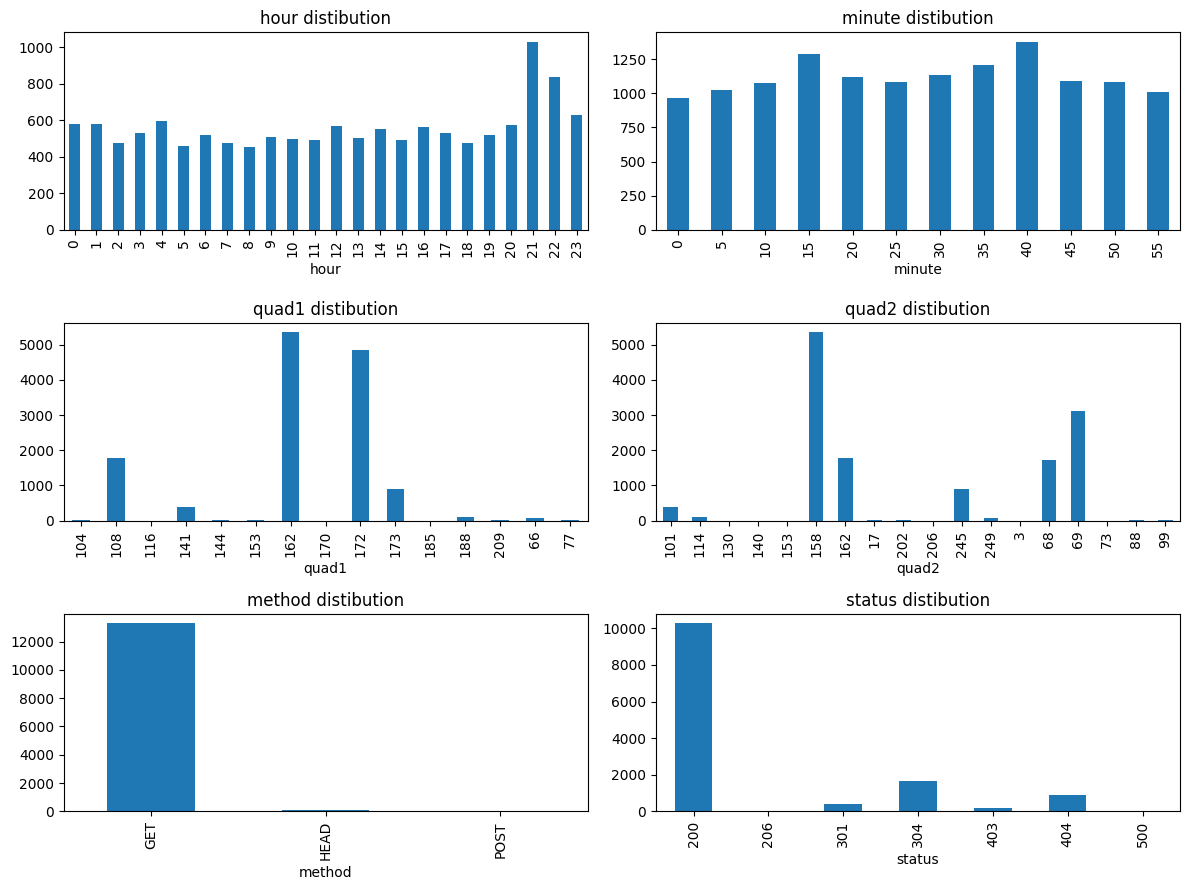

In [26]:
show_distributions(reqs)

In the plots we see some highly imbalanced classes and some mostly balanced ones.  The hours show a minor imbalance, but with a fairly strong pattern of more requests around 21:00–24:00 in Atlantic Daylight Time. The distribution of 5 minute increments within an hour is generally uniform, although the slight elevation of a few increments could possibly be more than random fluctuation.

The imbalance in the initial quads of IP address seems striking, and might initially suggest an important bias or error.  However 162.158.0.0/16 and 172.69.0.0/16 are assigned to the content delivery network that I use.  So the imbalance in these features has simply provided a clue that almost all requests are proxied through a known entity.

The class imbalances that remain are in the HTTP method and in the status code returned.  In neither case is it at all surprising that GET and 200 dominate their respective features.  This is what I expect, and even hope for in the behavior of my web site.  

Since *all* requests were logged, this is not a sample but rather a complete domain.  These pertain to my gnosis.cx domain in a specific time period, and we can draw no conclusion about other web domains or other dates without further analysis or reasoning.

For an analysis, we might want to make predictions that exactly reverse causality.  Perhaps we would like to treat the size of the response as an independent variable in our effort to predict time of day.  For example, it could be that large files are always requested around 7 p.m. rather than at other times.

---

For this section, we focused merely on recognizing, and to a limited extent analyzing, class imbalance.  What it means for the actual task to which we wish to put this data is another matter.  A significant distinction to keep in mind is that between independent and dependent variables.  Generally, imbalance in a dependent variable will skew classification models in a more important way than imbalance in an independent variable.  So, for example, if we wish to predict the likely status code that will be produced by a request based on other features of the request, we would be likely to use sampling techniques to *balance the data set* synthetically.

## Normalization and scaling

_Measure with a micrometer. Mark with chalk. Cut with an axe._

Rule for precision

Normalization of data is simply bringing all the features being utilized in a data set into a comparable numeric range.  When starkly different units are used for different features, some machine learning models will disproportionately utilize those features which simply have a larger numeric range.

To emphasize the motivation for normalization, we will create a very simple ML model on some overly neat data that illustrates an overwhelming benefit with scaling.  For this example, a small amount of code in scikit-learn is used.  The scaler classes in scikit-learn are extremely useful even if you do not wish to use that library for modeling.

In [27]:
unscaled = make_unscaled_features()
unscaled

,Feature_1,Feature_2,Target
0,0.112999,19247.756104,11.407035
1,0.204178,23432.270613,20.000000
2,0.173678,19179.445753,17.336683
3,0.161411,17579.625264,16.633166
4,0.192209,19255.160726,19.095477
...,...,...,...
195,0.110874,20213.848541,10.502513
196,0.137692,20934.654450,13.316583
197,0.184393,18855.241195,18.241206
198,0.177846,19760.314890,17.839196


The synthetic data set here has two features and one target; all are continuous variables.

At a glance, we can see that the Target values are on the order of 15, while Feature_1 is on the order of 0.1 and Feature_2 is on the order of 20,000.  The invented example does not assign any specific units for these measures, but there are many quantities you might measure whose units produce numeric values in those ranges.  As an initial question, we might ask whether any of the features have a univariate correlation with the target.  A machine learning model will find more than just this, but it is a useful first question.

In [28]:
GT(unscaled.corr().reset_index().round(2))

index,Feature_1,Feature_2,Target
Feature_1,1.0,-0.27,0.99
Feature_2,-0.27,1.0,-0.27
Target,0.99,-0.27,1.0


We see that Feature_1 has a very strong positive correlation with the Target, and Feature_2 has a moderate negative correlation.  So on the face of it, a model should have plenty to work with.  Indeed, we can tell from the correlation matrix that linear models would do extremely well, with or without normalization.

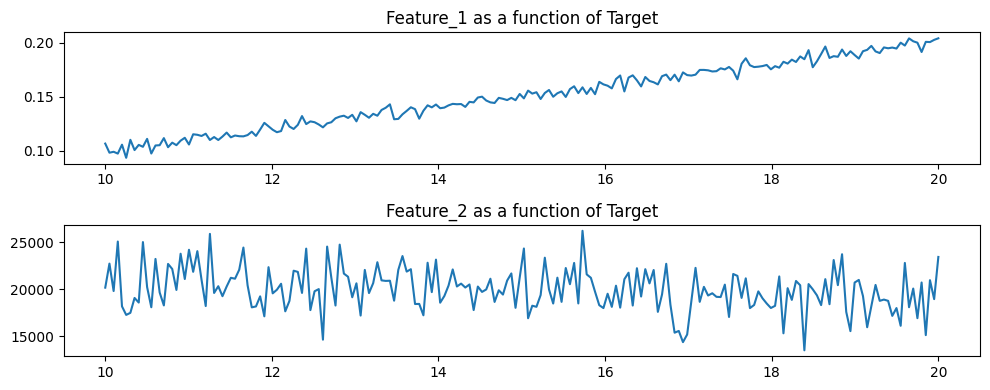

In [29]:
plot_univariate_trends(unscaled)

Feature_1 has a visually obvious correlation, Feature_2 reveals at most a very weak one to a human eye.

### Varieties of Scaling

In [30]:
from sklearn.model_selection import train_test_split

X = unscaled.drop('Target', axis=1)
y = unscaled['Target']

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, random_state=1))

Let's apply a machine learning model against this data, trying to predict the target based on the features.  In ML, we conventionally use the names capital X and and lowercase y for features and target, respectively.  

This usage follows the common pattern, from high school algebra, of naming an independent variable 'x' and a dependent variable 'y'. Since we generally have multiple features, a capital 'X' is used.  Good practice in machine learning reserves a portion of your training data for testing, so that you do not overfit your model.  That is done with the function `train_test_split()`.

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train).score(X_test, y_test)

0.027756186064182953

For the example, we use a K-neighbors regressor to try to model our data.  For many kinds of problems this is a very effective algorithms. It is also one that looks directly at distances in parameter space, and is hence very sensitive to scaling.  If we naïvely apply this model to our raw data, the R-squared score is very low, and other metrics would be similarly bad.

A "perfect" R-squared score is 1.0.  A very bad score is 0.0 (negative scores are also sometimes possible, and even worse in a sense.  But for anything below 0.25 or so, we essentially reject the model.

In [32]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = (
    train_test_split(X_new, y, random_state=1))

knn2 = KNeighborsRegressor()
knn2.fit(X_train, y_train).score(X_test, y_test)

0.9743878175626131

By using, in this case, a min-max scaler, we achieve a far better metric score.  The scaler we use here simply takes the minimum value of the raw feature, shifts all values by that amount toward zero by subtraction, then divides all values by the shifted maximum value.  

The effect is to produce a range that is always [0, 1], for every feature.  This synthetic feature does not have any physical meaning per se, as the original measure presumably did.  By applying this scaler, all features are guaranteed to occupy the same numeric range, although with the specific values distributed differently within their ranges.

I did not bother to scale the target in the above code.  There would be no harm in doing so for the model, but there is no benefit either since the target is not part of the parameter space of the features.  Moreover, if we scaled the target, we would have to remember to unscale it correspondingly to get a meaningful number in the desired units.

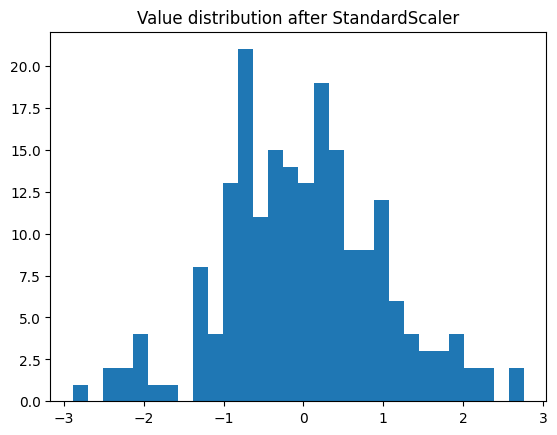

In [33]:
from sklearn.preprocessing import StandardScaler
X_new2 = StandardScaler().fit_transform(X)

# Second column for example (both were scaled)
plt.hist(X_new2[:, 1], bins=30)
plt.title("Value distribution after StandardScaler");

Another very common scaling technique is called StandardScaler in scikit-learn.  It sets the mean of a feature to zero and the standard deviation to one.  This scaling is particularly relevant when a variable is (very roughly) normally distributed.  The name hints that this approach is usually the default scaler to choose. The name derives from "standard deviation" rather than it being standard to scikit-learn. Here we display the values from Feature_2 which were around 20,000 in the raw data.

In [34]:
X['Feature_3'] = X.Feature_1
X.loc[0, 'Feature_3'] = 100

Let's replicate Feature_1 in the sample data set but make just one value (out of 200) an *extreme* outlier.  Recall that Feature_1 has values on the order of 0.1.  We will introduce a single value of 100 into the variable.  Arguably, this is an extreme enough outlier that we should have removed it already, but for whatever reason we did not.

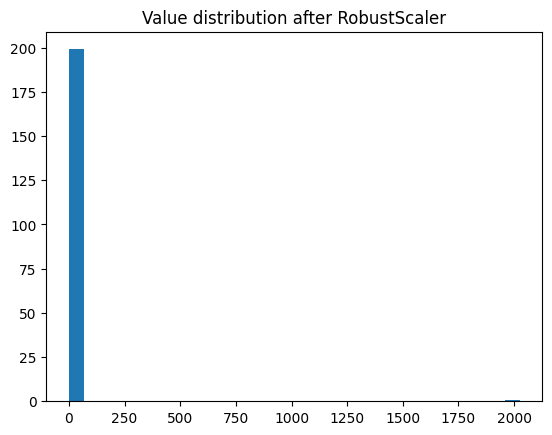

In [35]:
from sklearn.preprocessing import RobustScaler
X_new3 = RobustScaler().fit_transform(X)

# Third column for example (all were scaled)
plt.hist(X_new3[:, 2], bins=30)
plt.title("Value distribution after RobustScaler");

When we attempt to utilize RobustScaler, the transformed data still has one data point at an extreme value.  In fact, that extreme is worse than the out-of-bounds value, 100, that we selected; moreover, the outlier is even farther out than under a StandardScalar transformation.  RobustScaler is really only productive under a collection including a moderate number of moderate outliers of the sort that might have escaped anomaly detection.

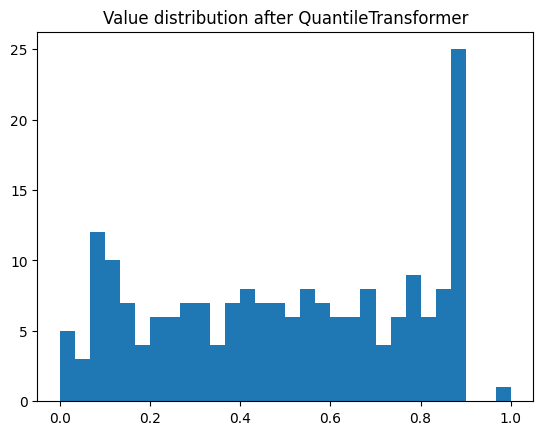

In [36]:
from sklearn.preprocessing import QuantileTransformer
# Ten quantiles is also called "decile"
deciles = QuantileTransformer(n_quantiles=10)
X_new4 = deciles.fit_transform(X)

# Third column for example (all were scaled)
plt.hist(X_new4[:, 2], bins=30)
plt.title("Value distribution after QuantileTransformer");

A stronger approach we can use is to rigorously scale values so that they fall *exclusively* within quantiles.  In essence, this scales the data within each quantile range separately, and hence imposes both reasonable distribution overall and strict bounds on values.

Obviously this transformed data is not completely uniform—it would have little value if there was not *some* variability beyond ordinal order—but it is bounded and reasonably evenly distributed across the range [0, 1].  The single outlier point remains as a minor outlier from the main distribution, but numerically not very distant.

Algorithms utilizing distance in parameter space include linear models, support vector machines, and k-nearest neighbor. Algorithms in the family of decision trees simply do not care about specific distance in a dimension, and neural networks can perform a kind of scaling by allowing a "scaling layer" that acts as a multiplier of each input feature.

In [56]:
status_codes = reqs.status.value_counts().to_frame().T
request_types = reqs.method.value_counts().to_frame().T

### Factor and Sample Weighting

In [57]:
GT(reqs.sample(8, random_state=72).drop('page', axis=1))

hour,minute,quad1,quad2,quad3,quad4,method,path,status
23,56,162,158,167,145,GET,/download/pywikipedia/cache,200
12,31,172,68,245,40,GET,/TPiP,200
1,44,172,69,63,176,GET,/download/eml3,200
12,38,172,69,63,160,HEAD,/publish/mertz,200
1,24,172,69,63,60,GET,/icons/silk,200
23,19,162,158,238,223,GET,/download/gnosis,200
3,4,172,69,234,139,GET,/publish/images,200
13,1,173,245,54,136,GET,/download/gnosis/util,200


Let's return to our web server data.

In the case of unbalanced feature classes, some models support *overweighting* minority classes rather than requiring oversampling them.  Over- and undersampling is discussed in a later lesson.  Many machine learning models utilize an explicit *hyperparameter* called something like `sample_weight`.

These same model classes also often have an option for `class_weight`, as a separate hyperparameter.  Sample weight allows you to overweight, or underweight, specific rows of input data while class weight allows you to over- or underweight specific target class values.

To add more nuance to this matter, we are not restricted to over/underweighting only to address class imbalance.  We can, in fact, apply it for any reason we like.  For example, we may know that certain measurements in our data set are more reliable than others, and wish to overweight those.  Or we may know that getting predictions right for samples with a certain characteristic is more important for task-specific reasons, even while not wishing entirely to discard those samples lacking that characteristic.

In [62]:
GT(status_codes).tab_header(title="HTTP Status Code Count")

GT(_tbl_data=         200   304  404  301  403  500  206
count  10280  1680  901  398  181    9    2, _body=<great_tables._gt_data.Body object at 0x7efc9944bbb0>, _boxhead=Boxhead([ColInfo(var='200', type=<ColInfoTypeEnum.default: 1>, column_label='200', column_align='right', column_width=None), ColInfo(var='304', type=<ColInfoTypeEnum.default: 1>, column_label='304', column_align='right', column_width=None), ColInfo(var='404', type=<ColInfoTypeEnum.default: 1>, column_label='404', column_align='right', column_width=None), ColInfo(var='301', type=<ColInfoTypeEnum.default: 1>, column_label='301', column_align='right', column_width=None), ColInfo(var='403', type=<ColInfoTypeEnum.default: 1>, column_label='403', column_align='right', column_width=None), ColInfo(var='500', type=<ColInfoTypeEnum.default: 1>, column_label='500', column_align='right', column_width=None), ColInfo(var='206', type=<ColInfoTypeEnum.default: 1>, column_label='206', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7efc9968c590>, _spanners=Spanners([]), _heading=Heading(title='HTTP Status Code Count', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7efc9968c110>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='tabl

In [63]:
GT(request_types).tab_header(title="HTTP Method Count")

GT(_tbl_data=method    GET  HEAD  POST
count   13294   109    48, _body=<great_tables._gt_data.Body object at 0x7efc99471630>, _boxhead=Boxhead([ColInfo(var='GET', type=<ColInfoTypeEnum.default: 1>, column_label='GET', column_align='right', column_width=None), ColInfo(var='HEAD', type=<ColInfoTypeEnum.default: 1>, column_label='HEAD', column_align='right', column_width=None), ColInfo(var='POST', type=<ColInfoTypeEnum.default: 1>, column_label='POST', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7efc9968ce90>, _spanners=Spanners([]), _heading=Heading(title='HTTP Method Count', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7efc9968d010>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_left_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), heading_background_color=OptionsInfo(scss=True, category='heading', type='value', value=None), heading_align=OptionsInfo(scss=True, category='heading', type='value', value='center'), heading_title_font_size=OptionsInfo(scss=True, category='heading', type='px', value='125%'), heading_title_font_weight=OptionsInfo(scss=True, category='heading', type='value', value='initial'), heading_subtitle_font_size=OptionsInfo(scss=True, category='heading', type='px', value='

Both method and status are highly imbalanced in pretty much the way we expect them to be in a web server. We might wish to predict status codes based on the other features of the data set without actually issuing an HTTP request.

GET requests are 122 times more common than HEAD requests, and 277 times more common than POST requests. This imbalance limits our ability to make predictions on the rare class values for the method for many models.

As well for our scenario, we wish our model to be more sensitive to paths under `/TPiP` and so will artificially overweight that by 5x as well.  This overweighting is simply by stipulation of a domain purpose, not inherent to the data.

In [64]:
# The row index positions for rows to overweight
tpip_rows = reqs[reqs.path == '/TPiP'].index
head_rows = reqs[reqs.method == 'HEAD'].index
post_rows = reqs[reqs.method == 'POST'].index

First we can identify those rows whose weighting we wish to adjust.  Other selectors than those shown could easily be used, but this is illustrative.

In [66]:
reqs_weighted = reqs.copy().drop("page", axis=1)
reqs_weighted['weight'] = 1  # Default weight of one
reqs_weighted.loc[tpip_rows, 'weight'] = 5
reqs_weighted.loc[head_rows, 'weight'] = 122
reqs_weighted.loc[post_rows, 'weight'] = 277

Next we can assign our chosen weights to each row within a DataFrame.

In [71]:
print(f"Records: {len(reqs_weighted):,}")
reqs_weighted.sample(4, random_state=72)

Records: 13,451


,hour,minute,quad1,quad2,quad3,quad4,method,path,status,weight
3347,23,56,162,158,167,145,GET,/download/pywikipedia/cache,200,1
2729,12,31,172,68,245,40,GET,/TPiP,200,5
8102,1,44,172,69,63,176,GET,/download/eml3,200,1
9347,12,38,172,69,63,160,HEAD,/publish/mertz,200,122


These sample weights are stored on a per-row basis, so we have 13,451 of them.  Most are simply weight 1, but some are overweighted.  

Configuring the weights we wish to use with the target is different.  We *could* leverage the sample weight itself to choose rows with certain target label; however, that approach is unnecessarily clunky and is not usually our preferred approach.  Instead, we simply wish to create a small mapping from label to weight.

In [74]:
target_weight = {code:1 for code in reqs.status.unique()}
target_weight[404] = 10
target_weight

{200: 1, 301: 1, 404: 10, 403: 1, 304: 1, 500: 1, 206: 1}

Let's stipulate that in our scenario we are especially interested in accurate prediction of 404 status codes, so will weight that target more heavily.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# Create the model object with target weights
rfc = RandomForestClassifier(class_weight=target_weight)

# Select and encode the features and target
X = reqs_weighted[['hour', 'minute', 'quad1', 'method', 'path']]

# Encode strings as ordinal integers
X = OrdinalEncoder().fit_transform(X)
y = reqs_weighted['status']
weight = reqs_weighted.weight

# Perform the train/test split, including weights
X_train, X_test, y_train, y_test, weights_train, _ = (
     train_test_split(X, y, weight, random_state=1))

# Fit the model on the training data and score it
rfc.fit(X_train, y_train, sample_weight=weights_train)
rfc.score(X_test, y_test)

0.8284269997026464

The code shown creates, fits, trains, and scores a RandomForest model.  The API will vary if you use some other library, but the concepts will remain the same.  As a minor API detail, we encode our string categorical values for this model type, so we will use `OrdinalEncoder`.

As with R-squared used in the regression example, 1.0 represents perfect *accuracy*.  Accuracy cannot be less than 0.0 though.

Without more context and analysis, I cannot say whether this model does well or poorly for the intended purpose.  Quite possibly some other model class and/or some better tuned weights would serve the hypothetical purpose better.  The steps in trying those are straightforward, and mostly the same as the code shown.

## Denouement

_Quality is never an accident. It is always the result of intelligent effort._

John Ruskin

In this lesson we focused on the problem of bias in data.  Data sets rarely, if ever, completely represent a population; rather they skew and select from that population to form a certain kind of picture.  Sometimes this bias is intentional and well-founded as a way of filling parameter spaces.  

Other times it simply reflects the distribution of quantities or classes in the underlying reality. In the second case it is both the inherent virtue of our data and a pitfall in our analysis.  

At other times still, elements of the data collection, collation, transcription, or aggregation, can introduce biases that are more subtle and may need to be remediated in some manner for our analyses and modeling of the data.  Detecting bias is the first step towards addressing it.

The lesson on anomaly detection provided hints about identifying data that is generically statistically unlikely within a collection of values.  But very often we want to look at problems that are more domain specific.  We are often able to take advantage of expectations we have about patterns in clean data that might be violated by the data we actually have.  These patterns might only be represented by custom code that algorithmically expresses these expectations but that cannot be formulated in terms of generic statistical tests.